In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import json
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from data_engineering import de

In [4]:
df = pd.read_csv("data/movie_data.csv")

/Users/daiglechris/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,13,14,15,16,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
# Initial analysis of dataframe
null_0 = pd.DataFrame(df.isnull().sum()).reset_index()
null_0.rename(columns={'index': 'factor', 0: 'num_null_0'}, inplace=True)
null_0.sort_values(by='num_null_0', axis=0, ascending=False, inplace=True)
null_0['miss_prop_0'] = round(null_0['num_null_0'] / df.shape[0], 4) * 100
df_info = {'obs_0':df.shape[0],
           'fac_0':df.shape[1],
           'null_0': null_0}
# Transformations to more accurately reflect data integrity issues
numeric_cols = ['budget', 'popularity', 'revenue',
                'runtime', 'vote_average', 'vote_count']
for col in numeric_cols:
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, downcast='float', errors='coerce'))
df['id'] = df['id'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['release_date'] = df['release_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
# Remove observations related to response variables
df = df.dropna(how='any', subset=['vote_count', 'vote_average', 'revenue'])
# Dataframe of the number of missing values after null removals
trans_0_null = pd.DataFrame(df.isnull().sum()).reset_index()
trans_0_null.rename(columns={'index': 'factor', 0: 'num_null_1'}, inplace=True)
trans_0_null['miss_prop_1'] = round(trans_0_null['num_null_1'] / df.shape[0], 4) * 100
null_1 = null_0.join(trans_0_null.set_index('factor'), on='factor')
# Update dataframe information dictionary
df_info['obs_1'] = df.shape[0]
df_info['fac_1'] = df.shape[1]
df_info['null_1'] = null_1

In [6]:
print("Initial observations: {:,}".format(df_info['obs_0']))
print("Number of observations after removing missing 'vote_count', 'vote_average', 'revenue': {:,}".format(df_info['obs_1']))

Initial observations: 133,744
Number of observations after removing missing 'vote_count', 'vote_average', 'revenue': 28,477


In [7]:
df_info['null_1'].sort_values('miss_prop_1', ascending=False)

,factor,num_null_0,miss_prop_0,num_null_1,miss_prop_1
2,homepage,114113,85.32,24461,85.90
15,tagline,120766,90.30,15499,54.43
6,overview,33226,24.84,458,1.61
12,runtime,105434,78.83,170,0.60
10,release_date,105375,78.79,111,0.39
13,spoken_languages,105264,78.71,0,0.00
3,id,32768,24.50,0,0.00
4,original_language,32768,24.50,0,0.00
5,original_title,32768,24.50,0,0.00
1,genres,32768,24.50,0,0.00


In [8]:
for col in df.columns:
    print(col)
    print(df[col].dtypes)
    print("{:.2%} null".format(df[col].isna().sum() / df.shape[0]))
    display(df[col].head())
    print("+" * len(col))

budget
float64
0.00% null


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: budget, dtype: float64

++++++
genres
object
0.00% null


0                       [{"id": 35, "name": "Comedy"}]
1                    [{"id": 12, "name": "Adventure"}]
2    [{"id": 10749, "name": "Romance"}, {"id": 18, ...
3                       [{"id": 35, "name": "Comedy"}]
4                                                   []
Name: genres, dtype: object

++++++
homepage
object
85.90% null


0                        NaN
1                        NaN
2                        NaN
3                        NaN
4    http://www.nwdfilms.com
Name: homepage, dtype: object

++++++++
id
float64
0.00% null


0     3924.0
1     6124.0
2     8773.0
3    21624.0
4    25449.0
Name: id, dtype: float64

++
original_language
object
0.00% null


0    en
1    de
2    fr
3    pa
4    en
Name: original_language, dtype: object

+++++++++++++++++
original_title
object
0.00% null


0                               Blondie
1                   Der Mann ohne Namen
2                   L'amour à vingt ans
3                      Jatts in Golmaal
4    New World Disorder 9: Never Enough
Name: original_title, dtype: object

++++++++++++++
overview
object
1.61% null


0    Blondie and Dagwood are about to celebrate the...
1    Der Mann ohne Namen is a German adventure movi...
2    Love at Twenty unites five directors from five...
3    Jatts in Golmal is an Comedy based movie. In w...
4    Gee Atherton ripping the Worlds course the day...
Name: overview, dtype: object

++++++++
popularity
float64
0.00% null


0    3.067
1    0.845
2    3.701
3    0.600
4    1.212
Name: popularity, dtype: float64

++++++++++
production_companies
object
0.00% null


0    [{"id": 5, "logo_path": "/71BqEFAF4V3qjjMPCpLu...
1                                                   []
2    [{"id": 38936, "logo_path": null, "name": "Uly...
3                                                   []
4                                                   []
Name: production_companies, dtype: object

++++++++++++++++++++
production_countries
object
0.00% null


0    [{"iso_3166_1": "US", "name": "United States o...
1            [{"iso_3166_1": "DE", "name": "Germany"}]
2    [{"iso_3166_1": "DE", "name": "Germany"}, {"is...
3                                                   []
4                                                   []
Name: production_countries, dtype: object

++++++++++++++++++++
release_date
datetime64[ns]
0.39% null


0   1938-11-30
1   1921-01-01
2   1962-06-22
3   2003-02-21
4   2008-12-08
Name: release_date, dtype: datetime64[ns]

++++++++++++
revenue
float64
0.00% null


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: revenue, dtype: float64

+++++++
runtime
float64
0.60% null


0     70.0
1    420.0
2    110.0
3      NaN
4     69.0
Name: runtime, dtype: float64

+++++++
spoken_languages
object
0.00% null


0             [{"iso_639_1": "en", "name": "English"}]
1                                                   []
2    [{"iso_639_1": "de", "name": "Deutsch"}, {"iso...
3                                                   []
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

++++++++++++++++
status
object
0.00% null


0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

++++++
tagline
object
54.43% null


0                                     NaN
1                                     NaN
2    The Intimate Secrets of Young Lovers
3                                     NaN
4                                     NaN
Name: tagline, dtype: object

+++++++
title
object
0.00% null


0                               Blondie
1         Peter Voss, Thief of Millions
2                        Love at Twenty
3                      Jatts in Golmaal
4    New World Disorder 9: Never Enough
Name: title, dtype: object

+++++
vote_average
float64
0.00% null


0    6.6
1    0.0
2    6.9
3    0.0
4    4.5
Name: vote_average, dtype: float64

++++++++++++
vote_count
float64
0.00% null


0     4.0
1     0.0
2    27.0
3     0.0
4     2.0
Name: vote_count, dtype: float64

++++++++++
keywords
object
0.00% null


0                  [{"id": 190801, "name": "blondie"}]
1                                                   []
2                                                   []
3                                                   []
4    [{"id": 6075, "name": "sport"}, {"id": 10192, ...
Name: keywords, dtype: object

++++++++


## Data Engineering Strategy
For each column in the dataframe, here's some info and my plan to handle them:
1. **budget**: float64, 0% null
> *ALREADY CONVERTED TO FLOAT AND COERCED NAN*
2. **genres**: object, 0% null, array holding dictionary, ex: `x = [{"id": 35, "name": "Comedy"}]`
> *DRAW VALUE FROM "name" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*
3. **homepage**: object, 85.9% null
> *DROP: TOO MUCH MISSING*
4. **id**: float64, 0% null
> *DROP: NO INFORMATION*
5. **original_language**: object, 0% null
> *ENFORCE STRING*
6. **original_title**: object, 0% null
> *ENFORCE STRING*
7. **overview**: object, 1.61% null
> *ENFORCE STRING*
8. **popularity**: float64, 0% null
9. **production_companies**: object, 0% null, array holding dictionary
> *DRAW VALUE FROM "name" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*
10. **production_countries**: object, 0% null, array holding dictionaries
> *DRAW VALUE FROM "iso_3166_1" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*
11. **release_date**: datetime64, 0.39% null
> *ALREADY CONVERTED TO DATETIME AND FILLED NAN, DROP MISSING OBSERVATIONS AS SO FEW*
12. **revenue**: float64, 0% null
> *RESPONSE VARIABLE*
13. **runtime**: float64, 0.6% null
> *ALREADY CONVERTED TO FLOAT AND COERCED NAN, DROP MISSING OBSERVATIONS AS SO FEW*
14. **spoken_languages**: object, 0% null, array of dictionaries
> *Drop and see if valuable after using only original_language*<br>
> If brought back in...<br>
> *DRAW VALUE FROM "iso_639_1" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY, CAPITALIZE*
15. **status**: object, 0% null
> *CHECK IF BINARY INDICATOR*
16. **tagline**: object, 54.43% null
> *FIND RELATIONSHIP BETWEEN ORIGINAL_LANGUAGE, PRODUCTION_COUNTRIES, AND STATUS*
17. **title**: object, 0% null
18. **vote_average**: float64, 0% null
> *PREVIOUSLY CONVERTED TO FLOAT AND DROPPED MISSING*
19. **vote_count**: float64, 0% null
> *PREVIOUSLY CONVERTED TO FLOAT AND DROPPED MISSING*
20. **keywords**: object, 0% null, array holding dictionaries
> *DRAW VALUE FROM "name" FROM EACH ELEMENT FROM ARRAY, ASSIGN NAN IF EMPTY*

In [9]:
df['genres'] = de.string_array_clean(df_col=df['genres'], element='name')
df.drop(['homepage', 'id'], axis=1, inplace=True)
df = df.dropna(how='any', subset=['release_date', 'runtime'])
df['original_language'] = df['original_language'].astype(str)
df['original_title'] = df['original_title'].astype(str)
df['overview'] = df['overview'].astype(str)
df['production_companies'] = de.string_array_clean(df_col=df['production_companies'], element='name')
df['production_countries'] = de.string_array_clean(df_col=df['production_countries'], element='iso_3166_1')
df['spoken_languages'] = de.string_array_clean(df_col=df['spoken_languages'], element='iso_639_1')
df['tagline'] = df['tagline'].astype(str)
df['title'] = df['title'].astype(str)
df['keywords'] = de.string_array_clean(df_col=df['keywords'], element='name')
df.reset_index(inplace = True, drop = True)

In [10]:
df.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,keywords
0,0.0,[Comedy],en,Blondie,Blondie and Dagwood are about to celebrate the...,3.067,[Columbia Pictures],[US],1938-11-30,0.0,70.0,[en],Released,nan,Blondie,6.6,4.0,[blondie]
1,0.0,[Adventure],de,Der Mann ohne Namen,Der Mann ohne Namen is a German adventure movi...,0.845,None,[DE],1921-01-01,0.0,420.0,None,Released,nan,"Peter Voss, Thief of Millions",0.0,0.0,None
2,0.0,"[Romance, Drama]",fr,L'amour à vingt ans,Love at Twenty unites five directors from five...,3.701,"[Ulysse Productions, Unitec Films, Cinesecolo,...","[DE, FR, IT, JP, PL]",1962-06-22,0.0,110.0,"[de, fr, it, ja, pl]",Released,The Intimate Secrets of Young Lovers,Love at Twenty,6.9,27.0,None
3,0.0,None,en,New World Disorder 9: Never Enough,Gee Atherton ripping the Worlds course the day...,1.212,None,None,2008-12-08,0.0,69.0,[en],Released,nan,New World Disorder 9: Never Enough,4.5,2.0,"[sport, mountain bike]"
4,0.0,[Family],en,Sesame Street: Elmo Loves You!,"Elmo is making a very, very super special surp...",0.843,None,None,2010-01-05,0.0,46.0,None,Released,nan,Sesame Street: Elmo Loves You!,0.0,0.0,None


In [11]:
# Initial analysis of dataframe
trans_null_2 = pd.DataFrame(df.isnull().sum()).reset_index()
trans_null_2.rename(columns={'index': 'factor', 0: 'num_null_2'}, inplace=True)
null_2 = null_1.join(trans_null_2.set_index('factor'), on='factor')
df_info['obs_2'] = df.shape[0]
df_info['fac_2'] = df.shape[1]
df_info['null_2'] = null_2

In [12]:
df_info['null_2']['miss_prop_2'] = round(df_info['null_2']['num_null_2'] / df.shape[0], 4) * 100
df_info['null_2'].sort_values('miss_prop_2', ascending=False)

,factor,num_null_0,miss_prop_0,num_null_1,miss_prop_1,num_null_2,miss_prop_2
19,keywords,105267,78.71,0,0.00,7051.0,24.99
8,production_companies,105264,78.71,0,0.00,6643.0,23.54
9,production_countries,105267,78.71,0,0.00,2658.0,9.42
13,spoken_languages,105264,78.71,0,0.00,1568.0,5.56
1,genres,32768,24.50,0,0.00,1048.0,3.71
15,tagline,120766,90.30,15499,54.43,0.0,0.00
4,original_language,32768,24.50,0,0.00,0.0,0.00
5,original_title,32768,24.50,0,0.00,0.0,0.00
6,overview,33226,24.84,458,1.61,0.0,0.00
7,popularity,105264,78.71,0,0.00,0.0,0.00


## Parse these crazy lists

            genres  num_obs   prop
0            Drama    11318  40.11
1           Comedy     9108  32.28
2         Thriller     4930  17.47
3           Action     4431  15.70
4          Romance     3923  13.90
5           Horror     3600  12.76
6            Crime     3117  11.05
7        Adventure     2504   8.87
8  Science Fiction     2141   7.59
9           Family     2111   7.48
Average: 3,057
Median: 2,111.0
Number of distinct: 19


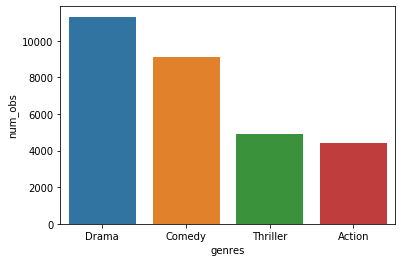

In [13]:
top_ten_genres = de.col_arr_parse(df,'genres')

                 keywords  num_obs  prop
0          woman director     1270  4.50
1        independent film     1203  4.26
2                  murder     1038  3.68
3  based on novel or book      918  3.25
4                 musical      611  2.17
5                   sport      577  2.04
6                violence      529  1.87
7                 revenge      462  1.64
8           new york city      445  1.58
9                    noir      415  1.47
Average: 8
Median: 2.0
Number of distinct: 16,334


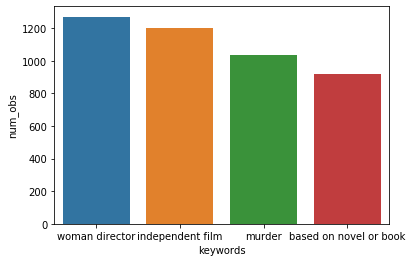

In [14]:
top_ten_kw = de.col_arr_parse(df,'keywords')

    production_companies  num_obs  prop
0  Warner Bros. Pictures      857  3.04
1              Paramount      729  2.58
2     Universal Pictures      700  2.48
3      Columbia Pictures      661  2.34
4       20th Century Fox      646  2.29
5    Metro-Goldwyn-Mayer      622  2.20
6                 Canal+      282  1.00
7         United Artists      246  0.87
8   Walt Disney Pictures      237  0.84
9        New Line Cinema      230  0.82
Average: 3
Median: 1.0
Number of distinct: 15,726


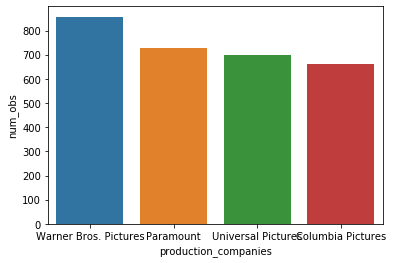

In [15]:
top_ten_prod_comp = de.col_arr_parse(df,'production_companies')

  production_countries  num_obs   prop
0                   US    14182  50.26
1                   GB     2780   9.85
2                   DE     2292   8.12
3                   FR     2217   7.86
4                   IT     1261   4.47
5                   JP     1176   4.17
6                   CA     1060   3.76
7                   ES      626   2.22
8                   IN      484   1.72
9                   HK      455   1.61
Average: 227
Median: 7.0
Number of distinct: 141


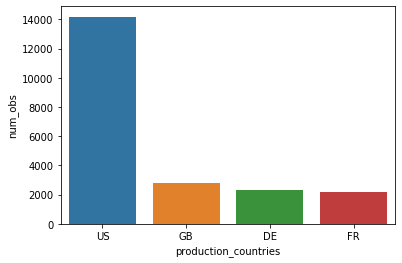

In [16]:
top_ten_prod_cont = de.col_arr_parse(df,'production_countries')

  spoken_languages  num_obs   prop
0               en    18773  66.53
1               fr     2604   9.23
2               de     2440   8.65
3               es     1697   6.01
4               it     1407   4.99
5               ja     1182   4.19
6               ru      681   2.41
7               zh      479   1.70
8               hi      425   1.51
9               da      382   1.35
Average: 282
Median: 9.0
Number of distinct: 123


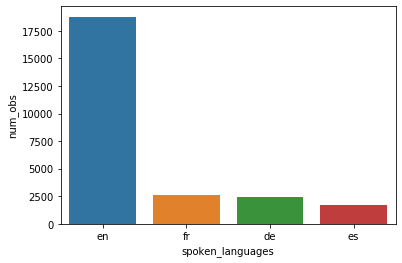

In [17]:
top_ten_sp_lang = de.col_arr_parse(df,'spoken_languages')

# NEXT STEP: Indicate if observation is in the top-ten

In [18]:
df['genres_top'] = df['genres'].apply(lambda x: de.top_rep(x_i=x, top_list=top_ten_genres))
df['keywords_top'] = df['keywords'].apply(lambda x: de.top_rep(x_i=x, top_list=top_ten_kw))
df['production_companies_top'] = df['production_companies'].apply(lambda x: de.top_rep(x_i=x, top_list=top_ten_prod_comp, indicate=True))
df['production_countries_top'] = df['production_countries'].apply(lambda x: de.top_rep(x_i=x, top_list=top_ten_prod_cont, indicate=True))
df['spoken_language_top'] = df['spoken_languages'].apply(lambda x: de.top_rep(x_i=x, top_list=top_ten_sp_lang))

In [19]:
df['genres_top'].value_counts()

0.1    9496
0.2    9073
0.3    4580
0.0    2628
0.4    1194
0.5     170
0.6      29
Name: genres_top, dtype: int64

In [20]:
df['keywords_top'].value_counts()

0.0    14697
0.1     5608
0.2      742
0.3      106
0.4       12
0.5        2
Name: keywords_top, dtype: int64

In [21]:
df['production_companies_top'].value_counts()

0.0    16481
1.0     5094
Name: production_companies_top, dtype: int64

In [22]:
df['production_countries_top'].value_counts()

1.0    22570
0.0     2990
Name: production_countries_top, dtype: int64

In [23]:
df['spoken_language_top'].value_counts()

0.1    20586
0.2     3141
0.0     1956
0.3      743
0.4      170
0.5       40
0.6        7
0.7        5
0.8        2
Name: spoken_language_top, dtype: int64

In [24]:
df_1 = df.drop(['genres','keywords', 'production_companies', 'production_countries', 'spoken_languages'], axis=1).copy()
df_1.reset_index(inplace = True, drop = True)

In [25]:
# # Find average revenue per year, find if observation's revenue is above average revenue, create indicator variable
df_1.reset_index(inplace = True, drop = True)
df_1['year'] = pd.to_datetime(df_1['release_date'], format='%Y-%m-%d').dt.year
ave_rev = {}
for year in set(df_1['year']):
    ave_rev[year] = round(df_1[df_1['year'] == year]['revenue'].mean())
df_1['above_ave_rev_yr'] = 0
for i in range(df_1.shape[0]):
    yr = df_1.loc[i,'year']
    ave_yr_rev = ave_rev[yr]
    if df_1.loc[i,'revenue'] >= ave_yr_rev:
        df_1.loc[i,'above_ave_rev_yr'] = 1
    else:
        continue
df_1['above_ave_rev_yr'] = df_1['above_ave_rev_yr'].astype(int)
df_1.drop('year', axis=1, inplace=True)
df_1.reset_index(inplace = True, drop = True)

In [26]:
# Analsis of dataframe after addressing columns with lists of elements:
trans_null_3 = pd.DataFrame(df_1.isnull().sum()).reset_index()
trans_null_3.rename(columns={'index': 'factor', 0: 'num_null_3'}, inplace=True)
null_3 = trans_null_3.join(null_2.set_index('factor'), on='factor')
df_info['obs_3'] = df_1.shape[0]
df_info['fac_3'] = df_1.shape[1]
df_info['null_3'] = null_3
df_info['null_3']['miss_prop_3'] = round(df_info['null_3']['num_null_3'] / df.shape[0], 4) * 100
df_1.reset_index(inplace = True, drop = True)
df_info['null_3'].sort_values('miss_prop_3', ascending=False)

,factor,num_null_3,num_null_0,miss_prop_0,num_null_1,miss_prop_1,num_null_2,miss_prop_2,miss_prop_3
14,keywords_top,7051,NaN,NaN,NaN,NaN,NaN,NaN,24.99
15,production_companies_top,6643,NaN,NaN,NaN,NaN,NaN,NaN,23.54
16,production_countries_top,2658,NaN,NaN,NaN,NaN,NaN,NaN,9.42
17,spoken_language_top,1568,NaN,NaN,NaN,NaN,NaN,NaN,5.56
13,genres_top,1048,NaN,NaN,NaN,NaN,NaN,NaN,3.71
0,budget,0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
10,title,0,105267.0,78.71,0.0,0.00,0.0,0.0,0.00
12,vote_count,0,105267.0,78.71,0.0,0.00,0.0,0.0,0.00
11,vote_average,0,105267.0,78.71,0.0,0.00,0.0,0.0,0.00
9,tagline,0,120766.0,90.30,15499.0,54.43,0.0,0.0,0.00


# Handle Categoricals:
1. original_language: dummies
2. original_title: count length, drop
3. overview: count length, drop
4. status: dummies
5. tagline: count length, drop
6. title: count length, drop

In [27]:
# 1. original_language: dummies
df_dum = pd.get_dummies(df_1['original_language'], dummy_na=True, drop_first=True)
df_1 = pd.concat([df_1.drop(columns='original_language'), df_dum], axis=1)
df_1.shape

(28218, 92)

In [28]:
# 2. original_title: count length, drop
df_1['orig_title_len'] = df_1['original_title'].apply(lambda x: x.count(' ') + 1 if len(x) !=0 else 0)
df_1 = df_1.drop(columns='original_title')
df_1.shape

(28218, 92)

In [29]:
# 3. overview: count length, drop
df_1['overview_len'] = df_1['overview'].apply(lambda x: x.count(' ') + 1 if len(x) !=0 else 0)
df_1 = df_1.drop(columns='overview')
df_1.shape

(28218, 92)

In [30]:
# 4. status: dummies
df_dum = pd.get_dummies(df_1['status'], dummy_na=True, drop_first=True)
df_1 = pd.concat([df_1.drop(columns='status'), df_dum], axis=1)
df_1.shape

(28218, 92)

In [31]:
# 5. tagline: count length, drop
df_1['tagline_len'] = df_1['tagline'].apply(lambda x: x.count(' ') + 1 if len(x) !=0 else 0)
df_1 = df_1.drop(columns='tagline')
df_1.shape

(28218, 92)

In [32]:
# 6. title: count length, drop
df_1['title_len'] = df_1['title'].apply(lambda x: x.count(' ') + 1 if len(x) !=0 else 0)
df_1 = df_1.drop(columns='title')
df_1.shape

(28218, 92)

In [33]:
df_1.reset_index(inplace = True, drop = True)

# Impute with with KNN

In [34]:
imputer = KNNImputer(n_neighbors=int(round(np.sqrt(df_1.shape[0]))))

In [35]:
%%time
df_1.reset_index(inplace = True, drop = True)
impute_df = df_1.drop(columns='release_date')
impute_df_filled = imputer.fit_transform(X=impute_df)

CPU times: user 1min 12s, sys: 6.49 s, total: 1min 18s
Wall time: 1min 13s


In [36]:
imputed_cols = list(df_1.drop(columns='release_date').columns)
df_impute = pd.DataFrame(data=impute_df_filled, columns=imputed_cols)
df_impute.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,genres_top,keywords_top,production_companies_top,production_countries_top,...,vi,xx,zh,zu,NaN,orig_title_len,overview_len,NaN,tagline_len,title_len
0,0.0,3.067,0.0,70.0,6.6,4.0,0.100000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,36.0,0.0,1.0,1.0
1,0.0,0.845,0.0,420.0,0.0,0.0,0.100000,0.024405,0.047619,1.000000,...,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,1.0,5.0
2,0.0,3.701,0.0,110.0,6.9,27.0,0.200000,0.038095,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,4.0,41.0,0.0,6.0,3.0
3,0.0,1.212,0.0,69.0,4.5,2.0,0.095833,0.100000,0.107143,0.815476,...,0.0,0.0,0.0,0.0,0.0,6.0,68.0,0.0,1.0,6.0
4,0.0,0.843,0.0,46.0,0.0,0.0,0.100000,0.027381,0.053571,0.892857,...,0.0,0.0,0.0,0.0,0.0,5.0,94.0,0.0,1.0,5.0


In [37]:
df_1_impute_fill = pd.concat([df_impute, df_1['release_date']], axis=1)
df_1_impute_fill.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,genres_top,keywords_top,production_companies_top,production_countries_top,...,xx,zh,zu,NaN,orig_title_len,overview_len,NaN,tagline_len,title_len,release_date
0,0.0,3.067,0.0,70.0,6.6,4.0,0.100000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,36.0,0.0,1.0,1.0,1938-11-30
1,0.0,0.845,0.0,420.0,0.0,0.0,0.100000,0.024405,0.047619,1.000000,...,0.0,0.0,0.0,0.0,4.0,14.0,0.0,1.0,5.0,1921-01-01
2,0.0,3.701,0.0,110.0,6.9,27.0,0.200000,0.038095,0.000000,1.000000,...,0.0,0.0,0.0,0.0,4.0,41.0,0.0,6.0,3.0,1962-06-22
3,0.0,1.212,0.0,69.0,4.5,2.0,0.095833,0.100000,0.107143,0.815476,...,0.0,0.0,0.0,0.0,6.0,68.0,0.0,1.0,6.0,2008-12-08
4,0.0,0.843,0.0,46.0,0.0,0.0,0.100000,0.027381,0.053571,0.892857,...,0.0,0.0,0.0,0.0,5.0,94.0,0.0,1.0,5.0,2010-01-05


In [39]:
df_final = df_1_impute_fill.copy()

In [41]:
df_final.shape

(28218, 92)

# Posing the Questions:

What's the relationship between a movie's rating and revenue

In [44]:
fig = px.histogram(df_final,
                   x='vote_average',
                   color='above_ave_rev_yr',
                  opacity=0.75)
fig.update_layout(title_text="Distribution of Ratings",
                  showlegend=True)
fig.update_yaxes(title_text="Number of Votes")
fig.update_xaxes(title_text="Average Vote")
fig.update_layout(legend_title_text='Above Average Revenue for Year')
fig.show()

What's the relationship between a movie's age and ratings

In [49]:
fig = px.scatter(df_final,
                 x="release_date",
                 y="vote_count")
fig.update_layout(title='Relationship of Release Date and Vote Count')
fig.update_yaxes(title_text="Number of Votes")
fig.update_xaxes(title_text="Year")
fig.show()

Can I predict revenue:

In [48]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

In [58]:
X = df_final.drop(['revenue', 'above_ave_rev_yr', 'release_date'], axis=1)
y = df_final['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
lm_model = LinearRegression(normalize=True)
r_model = Ridge(normalize=True)

lm_model.fit(X_train, y_train)
r_model.fit(X_train, y_train)
print('Linear Regression Train R2: {}'.format(lm_model.score(X_train, y_train)))
print('Ridge Train R2: {}'.format(r_model.score(X_train, y_train)))

lm_preds = lm_model.predict(X_test)
r_preds = r_model.predict(X_test)
print('Linear Regression Test R2: {}'.format(round(lm_model.score(X_test, y_test),4)))
print('Ridge Test R2: {}'.format(round(r_model.score(X_test, y_test),4)))

Linear Regression Train R2: 0.7635421329028813
Ridge Train R2: 0.6544291213406291
Linear Regression Test R2: -5.3925421716688385e+22
Ridge Test R2: 0.5573


Can I predict if revenue is higher than the average for the year:

In [ ]:
log_model = LinearRegression(normalize=True)
r_model = Ridge(normalize=True)

lm_model.fit(X_train, y_train)
r_model.fit(X_train, y_train)
print('Linear Regression Train R2: {}'.format(lm_model.score(X_train, y_train)))
print('Ridge Train R2: {}'.format(r_model.score(X_train, y_train)))

lm_preds = lm_model.predict(X_test)
r_preds = r_model.predict(X_test)
print('Linear Regression Test R2: {}'.format(round(lm_model.score(X_test, y_test),4)))
print('Ridge Test R2: {}'.format(round(r_model.score(X_test, y_test),4)))